# Time Series Project - Graphing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [2]:
# Format date and add columns to dataframe
def Organize_Data(i):
    i['Date'] = pd.to_datetime(i['Date'])
    i['YEAR'] = [x.year for x in i.Date]
    i['MONTH'] = [x.month for x in i.Date]
    i['DAY'] = [x.day for x in i.Date]
    i['DAY_OF_YEAR'] = [x.dayofyear for x in i.Date]

In [3]:
# Daily date vs. temperature graphs
# i, interger 0-infinity; q, data; g, color; r, location
def Daily_Side_By_Side(i, q, g, r):
    axes[i].plot(q['Date'], q['Temp'], color='%s' % g)
    axes[i].set_xlabel('Date', fontsize=18)
    axes[i].set_ylabel('Temperature', fontsize=18)
    axes[i].set_title('%s' % r, fontsize=18)
    
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(30)

In [4]:
# Monthly average date vs. temperature graphs
# i, interger 0-infinity; q, data; g, color; r, location
def Side_By_Side(i, q, g, r):
    axes[i].plot(q.MONTH, q.Temp, color='%s' % g)
    axes[i].set_xlabel('Month', fontsize=18)
    axes[i].set_ylabel('Temperature ($^\circ$C)', fontsize=18)
    axes[i].set_title('%s' % r, fontsize=18)

### Load Data

In [5]:
# Load data into pandas dataframes
df = pd.read_csv('../data/san_diego.csv')
df2 = pd.read_csv('../data/santa_cruz.csv')
df3 = pd.read_csv('../data/bird_rock.csv')
df4 = pd.read_csv('../data/SD_ledge.csv')

### Format data

In [6]:
# Uses Organize_data function to format data
Organize_Data(df)
Organize_Data(df2)
Organize_Data(df3)
Organize_Data(df4)

In [7]:
# Group data by Month column and calculate mean
df_mean = df.groupby(['MONTH'], as_index=False).mean()
df2_mean = df2.groupby(['MONTH'], as_index=False).mean()
df3_mean = df3.groupby(['MONTH'], as_index=False).mean()
df4_mean = df4.groupby(['MONTH'], as_index=False).mean()

## Side-by-side Graphs

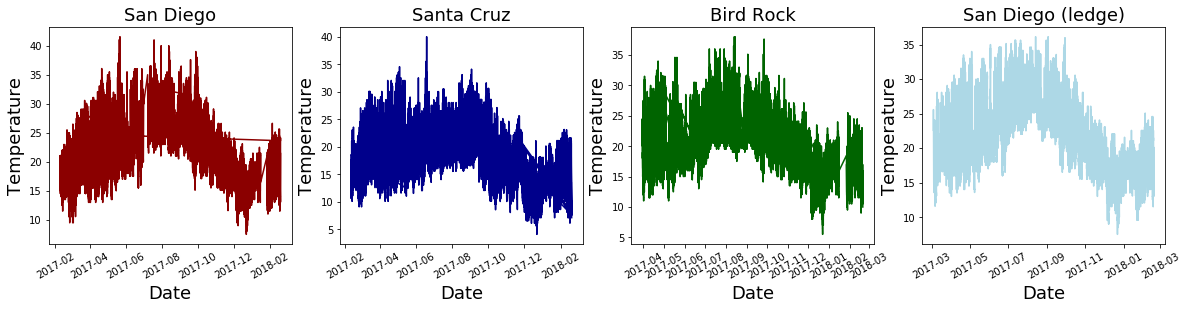

In [8]:
# Graphing subplots for daily temperature at four different locations
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))

Daily_Side_By_Side(0, df, 'darkred', 'San Diego')
Daily_Side_By_Side(1, df2, 'darkblue', 'Santa Cruz')
Daily_Side_By_Side(2, df3, 'darkgreen', 'Bird Rock')
Daily_Side_By_Side(3, df4, 'lightblue', 'San Diego (ledge)')

fig.savefig('../figures/daily_sidebyside.png', dpi=300)

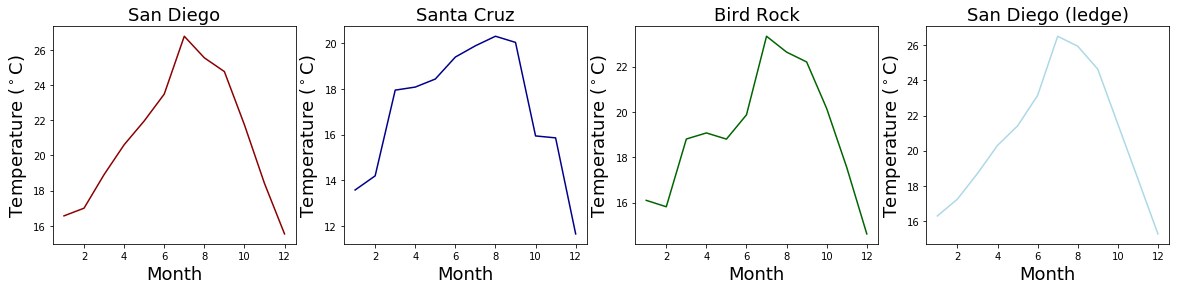

In [9]:
# Graphing subplots of average monthly temperature at four different locations
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
mons = ['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec']

Side_By_Side(0, df_mean, 'darkred', 'San Diego')
Side_By_Side(1, df2_mean, 'darkblue', 'Santa Cruz')
Side_By_Side(2, df3_mean, 'darkgreen', 'Bird Rock')
Side_By_Side(3, df4_mean, 'lightblue', 'San Diego (ledge)')

fig.savefig('../figures/side_by_side.png', dpi=300)

## Combined graphs

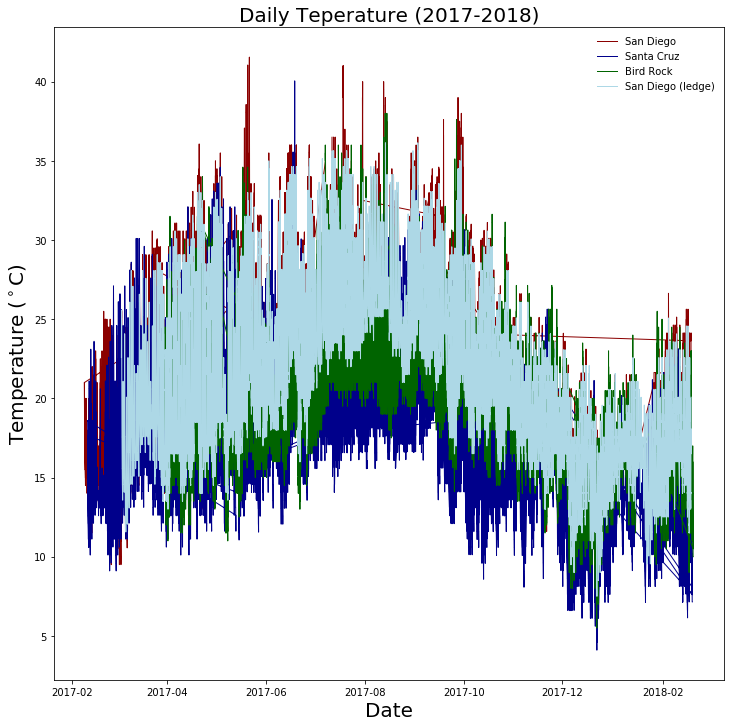

In [10]:
# Graphing single-plot of daily temperature for four different locations
fig, ax = plt.subplots(figsize=(12,12))

ax.plot(df['Date'], df['Temp'], 'darkred', lw=1, label="San Diego")
ax.plot(df2['Date'], df2['Temp'], 'darkblue', lw=1, label="Santa Cruz")
ax.plot(df3['Date'], df3['Temp'], 'darkgreen', lw=1, label="Bird Rock")
ax.plot(df4['Date'], df4['Temp'], 'lightblue', lw=1, label="San Diego (ledge)")
ax.legend(loc=1, frameon=False); # upper left corner, no frame
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Temperature ($^\circ$C)', fontsize=20)
ax.set_title('Daily Teperature (2017-2018)', fontsize=20);

In [11]:
# Save figure in figures directory
fig.savefig('../figures/daily_temp.png', dpi=300)

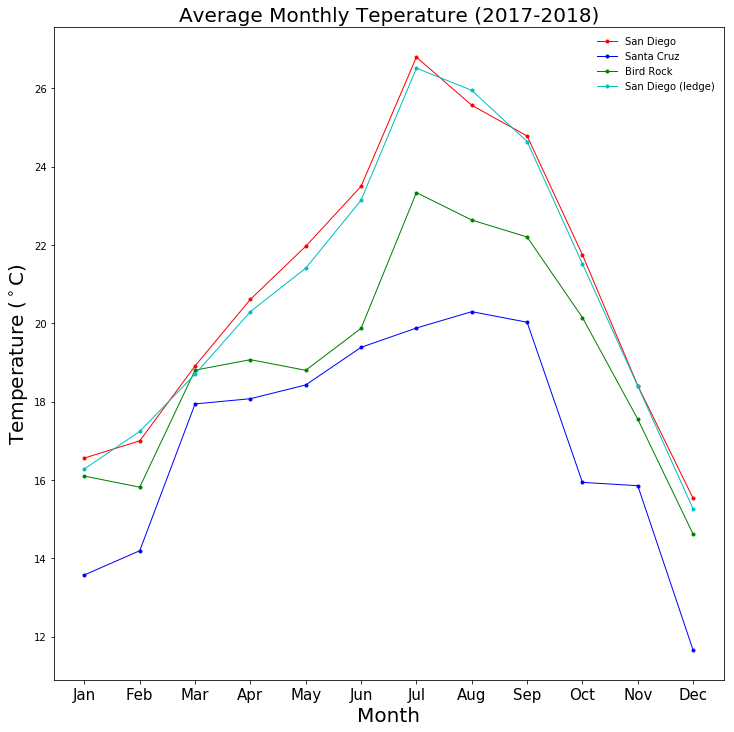

In [12]:
# Graphing single-plot of average monthly temperature at four different locations
fig, ax = plt.subplots(figsize=(12,12))
mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec']

ax.plot(df_mean.MONTH, df_mean.Temp, 'r.-', lw=1, label="San Diego")
ax.plot(df2_mean.MONTH, df2_mean.Temp, 'b.-', lw=1, label="Santa Cruz")
ax.plot(df3_mean.MONTH, df3_mean.Temp, 'g.-', lw=1, label="Bird Rock")
ax.plot(df4_mean.MONTH, df4_mean.Temp, 'c.-', lw=1, label="San Diego (ledge)")
ax.legend(loc=1, frameon=False); # upper left corner, no frame
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Temperature ($^\circ$C)', fontsize=20)
ax.set_title('Average Monthly Teperature (2017-2018)', fontsize=20)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(mon, fontsize=15);

In [13]:
# Save figure in figures directory
fig.savefig('../figures/monthly_average.png', dpi=300)